# Problem Statement - Novartis ML Challenge

    Predict if the server will be hacked

All the countries across the globe have adapted to means of digital payments and with the increased volume of digital payments, hacking has become a pretty common event wherein the hacker can try to hack your details just with your phone number linked to your bank account. However, there is data with some anonymized variables based on which one can predict that the hack is going to happen.

Your work is to build a predictive model which can identify a pattern in these variables and suggest that a hack is going to happen so that the cyber security can somehow stop it before it actually happens. You have to predict the column: "MALICIOUS OFFENSE.

# Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
train = pd.read_csv('/kaggle/input/novartis-data/Train.csv')
test = pd.read_csv('/kaggle/input/novartis-data/Test.csv')
test1 = pd.read_csv('/kaggle/input/novartis-data/Test.csv')

In [3]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


# Understanding the data

In [4]:
train.shape, test.shape

((23856, 18), (15903, 17))

In [5]:
train.X_12.fillna(2, inplace=True)
test.X_12.fillna(2, inplace=True)

# Feature Engineering and Data Preprocessing

In the below code, date parameter is segregrated into year, month, day and weekday so that it can improve the performance of machine learning model.

In [6]:
train['DATE'] = pd.to_datetime(train['DATE'], format='%d-%b-%y')
test['DATE'] = pd.to_datetime(test['DATE'], format='%d-%b-%y')
test1['DATE'] = pd.to_datetime(test1['DATE'], format='%d-%b-%y')

In [7]:
for i in (train, test):
    i['YEAR'] = i.DATE.dt.year
    i['MONTH'] = i.DATE.dt.month
    i['DAY'] = i.DATE.dt.day
    i['WEEKDAY'] = i.DATE.dt.dayofweek

# Visualization on date features

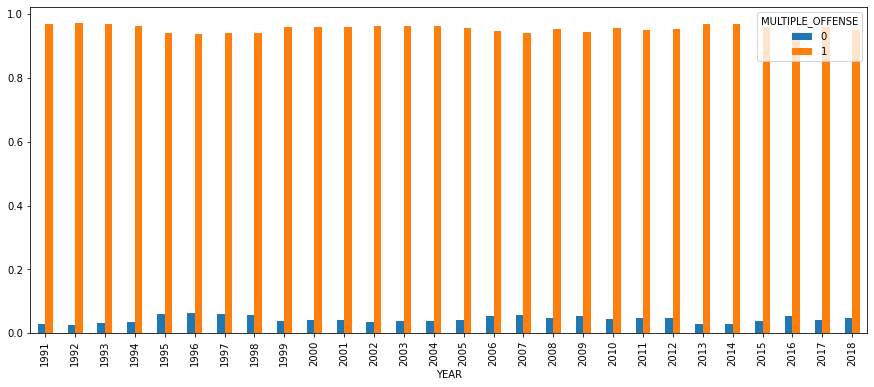

In [8]:
YEAR = pd.crosstab(train['YEAR'],train['MULTIPLE_OFFENSE'])
YEAR.div(YEAR.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(15,6))

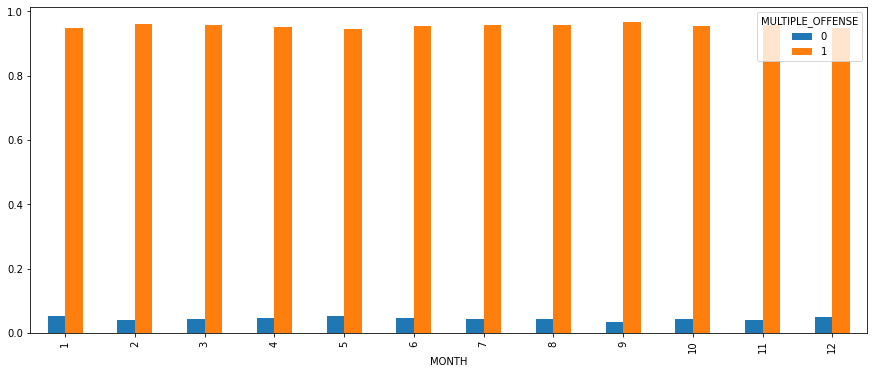

In [9]:
MONTH = pd.crosstab(train['MONTH'],train['MULTIPLE_OFFENSE'])
MONTH.div(MONTH.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(15,6))

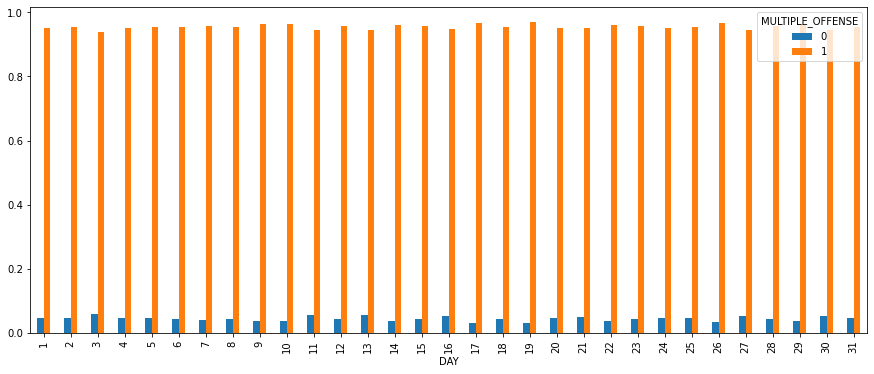

In [10]:
DAY = pd.crosstab(train['DAY'],train['MULTIPLE_OFFENSE'])
DAY.div(DAY.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(15,6))

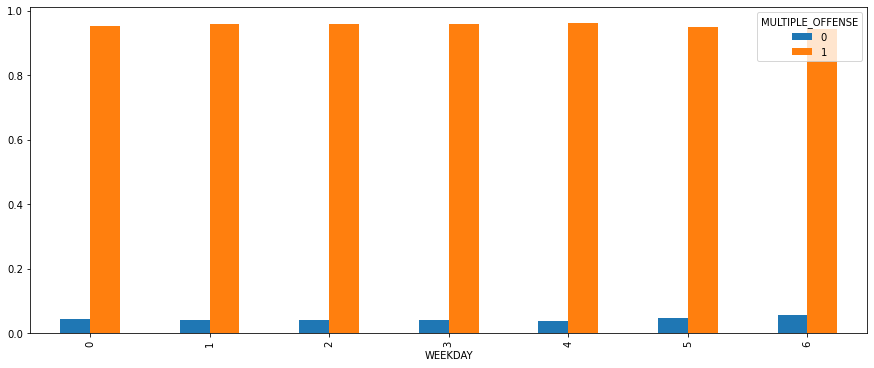

In [11]:
WEEKDAY = pd.crosstab(train['WEEKDAY'],train['MULTIPLE_OFFENSE'])
WEEKDAY.div(WEEKDAY.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(15,6))

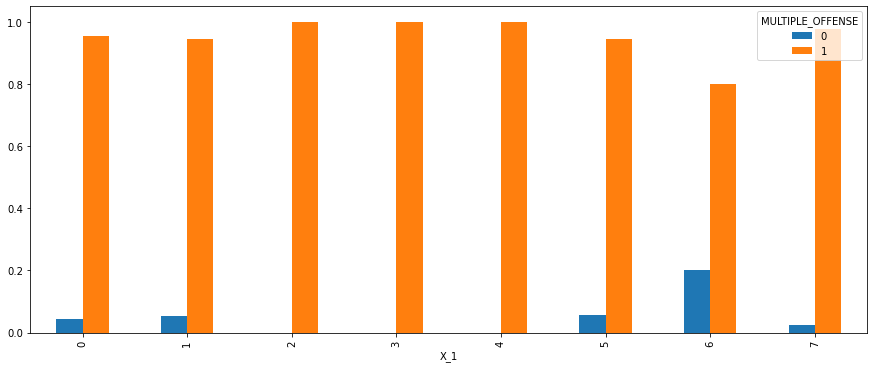

In [12]:
X_1 = pd.crosstab(train['X_1'],train['MULTIPLE_OFFENSE'])
X_1.div(X_1.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(15,6))

train_df = train.copy()
test_df = test.copy()

train_df.drop(train_df[(train_df['X_1']==2) | (train_df['X_1']==3) | (train_df['X_1']==4)].index, inplace=True)
test_df.drop(test_df[(test_df['X_1']==2) | (test_df['X_1']==3) | (test_df['X_1']==4)].index, inplace=True)

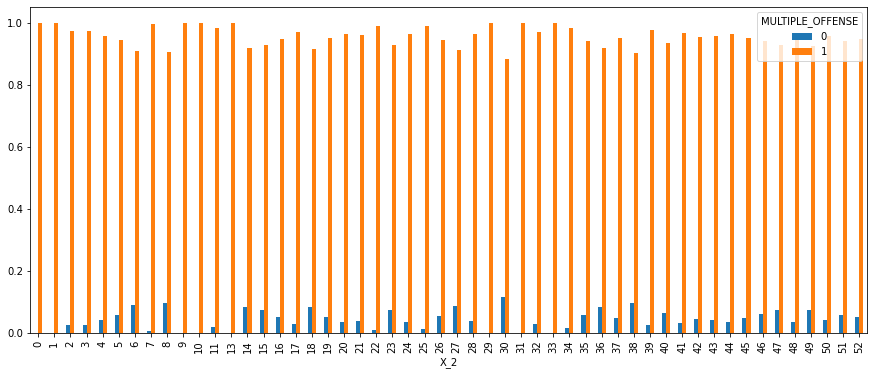

In [13]:
X_2 = pd.crosstab(train['X_2'],train['MULTIPLE_OFFENSE'])
X_2.div(X_2.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(15,6))

train_df.drop(train_df[(train_df['X_2']==0) | 
                       (train_df['X_2']==1) | 
                       (train_df['X_2']==9) | 
                       (train_df['X_2']==10) | 
                       (train_df['X_2']==13) |
                       (train_df['X_2']==29) | 
                       (train_df['X_2']==31) | 
                       (train_df['X_2']==33)].index, inplace=True)

test_df.drop(test_df[(test_df['X_2']==0) | 
                       (test_df['X_2']==1) | 
                       (test_df['X_2']==9) | 
                       (test_df['X_2']==10) | 
                       (test_df['X_2']==13) |
                       (test_df['X_2']==29) | 
                       (test_df['X_2']==31) | 
                       (test_df['X_2']==33)].index, inplace=True)

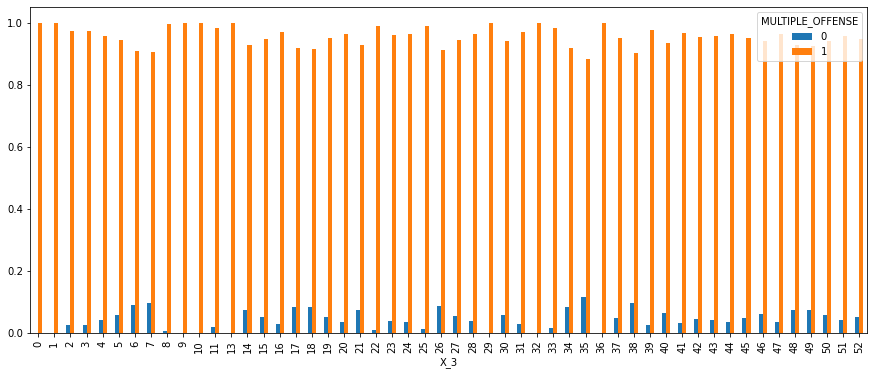

In [14]:
X_3 = pd.crosstab(train['X_3'],train['MULTIPLE_OFFENSE'])
X_3.div(X_3.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(15,6))

train_df.drop(train_df[(train_df['X_3']==0) | 
                       (train_df['X_3']==1) | 
                       (train_df['X_3']==9) | 
                       (train_df['X_3']==10) | 
                       (train_df['X_3']==13) |
                       (train_df['X_3']==29) | 
                       (train_df['X_3']==32) | 
                       (train_df['X_3']==36)].index, inplace=True)

test_df.drop(test_df[(test_df['X_3']==0) | 
                       (test_df['X_3']==1) | 
                       (test_df['X_3']==9) | 
                       (test_df['X_3']==10) | 
                       (test_df['X_3']==13) |
                       (test_df['X_3']==29) | 
                       (test_df['X_3']==32) | 
                       (test_df['X_3']==36)].index, inplace=True)

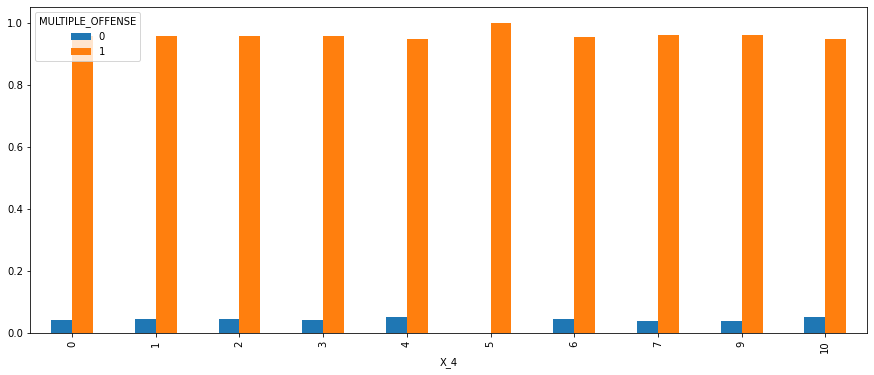

In [15]:
X_4 = pd.crosstab(train['X_4'],train['MULTIPLE_OFFENSE'])
X_4.div(X_4.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(15,6))

train_df.drop(train_df[(train_df['X_4']==5)].index, inplace=True)
test_df.drop(test_df[(test_df['X_4']==5)].index, inplace=True)

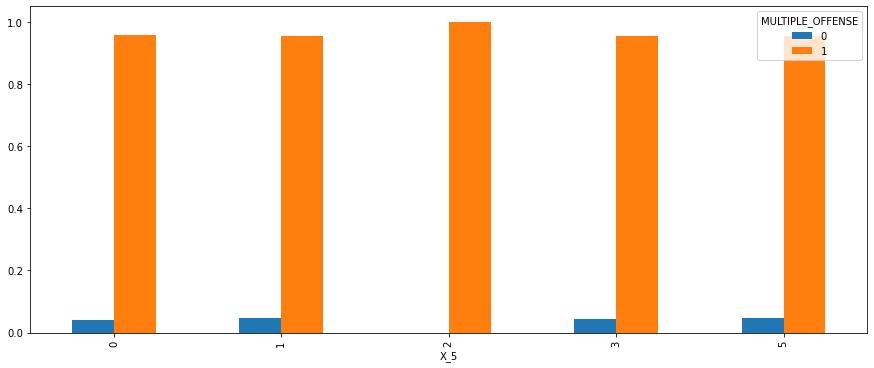

In [16]:
X_5 = pd.crosstab(train['X_5'],train['MULTIPLE_OFFENSE'])
X_5.div(X_5.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(15,6))

train_df.drop(train_df[(train_df['X_5']==2)].index, inplace=True)
test_df.drop(test_df[(test_df['X_5']==2)].index, inplace=True)

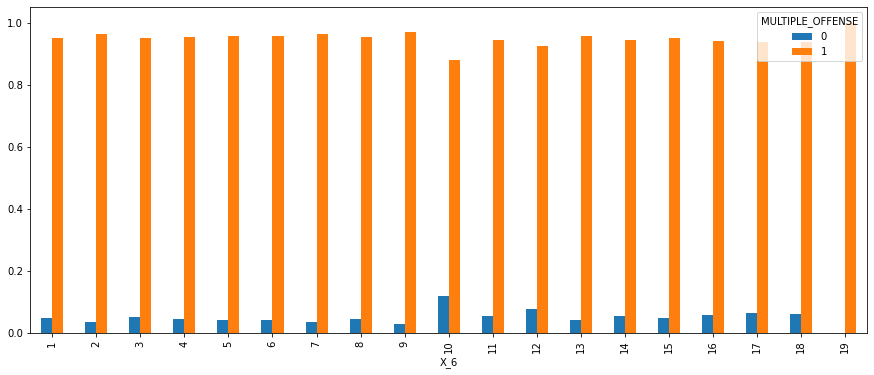

In [17]:
X_6 = pd.crosstab(train['X_6'],train['MULTIPLE_OFFENSE'])
X_6.div(X_6.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(15,6))

train_df.drop(train_df[(train_df['X_6']==19)].index, inplace=True)
test_df.drop(test_df[(test_df['X_6']==19)].index, inplace=True)

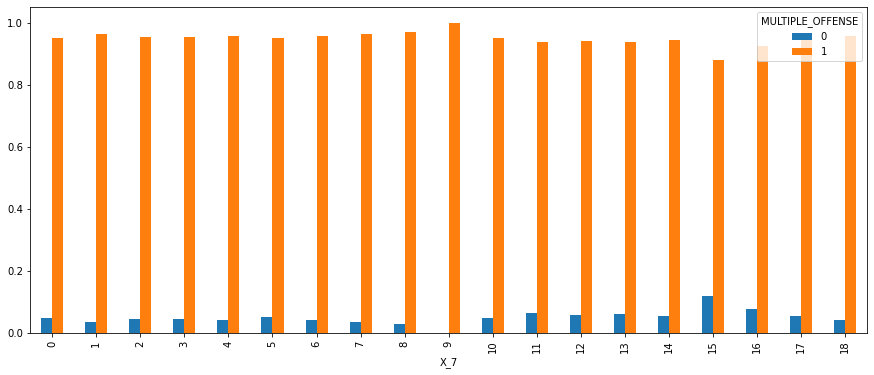

In [18]:
X_7 = pd.crosstab(train['X_7'],train['MULTIPLE_OFFENSE'])
X_7.div(X_7.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(15,6))

train_df.drop(train_df[(train_df['X_7']==9)].index, inplace=True)
test_df.drop(test_df[(test_df['X_7']==9)].index, inplace=True)

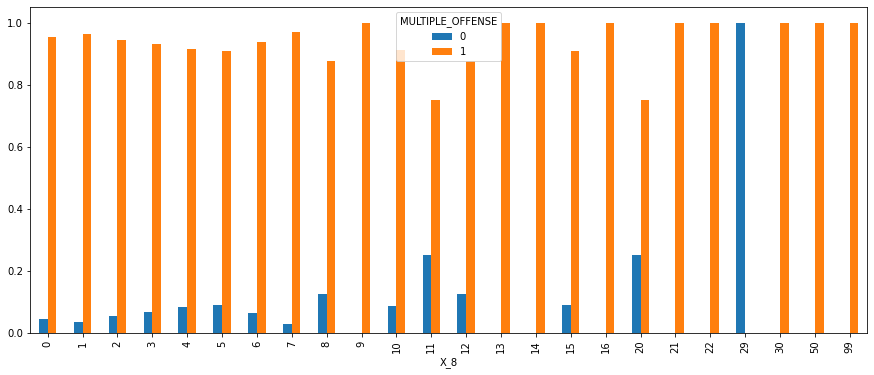

In [19]:
X_8 = pd.crosstab(train['X_8'],train['MULTIPLE_OFFENSE'])
X_8.div(X_8.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(15,6))

train_df.drop(train_df[(train_df['X_8']==9) | 
                       (train_df['X_8']==13) | 
                       (train_df['X_8']==14) | 
                       (train_df['X_8']==16) | 
                       (train_df['X_8']==21) |
                       (train_df['X_8']==22) | 
                       (train_df['X_8']==30) | 
                       (train_df['X_8']==50) | 
                       (train_df['X_8']==99)].index, inplace=True)

test_df.drop(test_df[(test_df['X_8']==9) | 
                       (test_df['X_8']==13) | 
                       (test_df['X_8']==14) | 
                       (test_df['X_8']==16) | 
                       (test_df['X_8']==21) |
                       (test_df['X_8']==22) | 
                       (test_df['X_8']==30) | 
                       (test_df['X_8']==50) | 
                       (test_df['X_8']==99)].index, inplace=True)

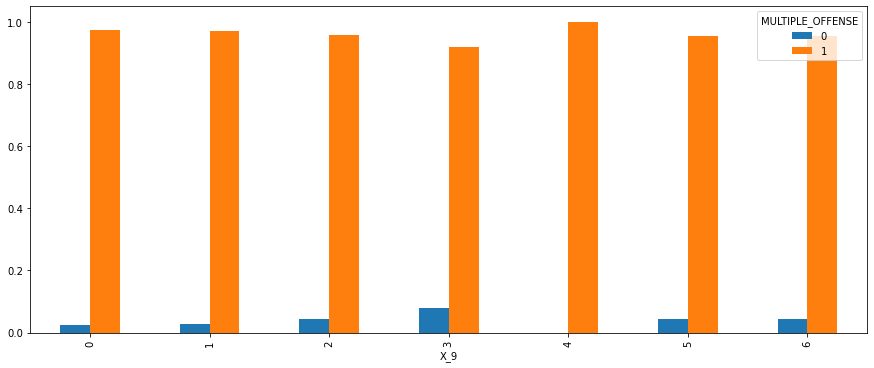

In [20]:
X_9 = pd.crosstab(train['X_9'],train['MULTIPLE_OFFENSE'])
X_9.div(X_9.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(15,6))

train_df.drop(train_df[(train_df['X_9']==4)].index, inplace=True)

test_df.drop(test_df[(test_df['X_9']==4)].index, inplace=True)

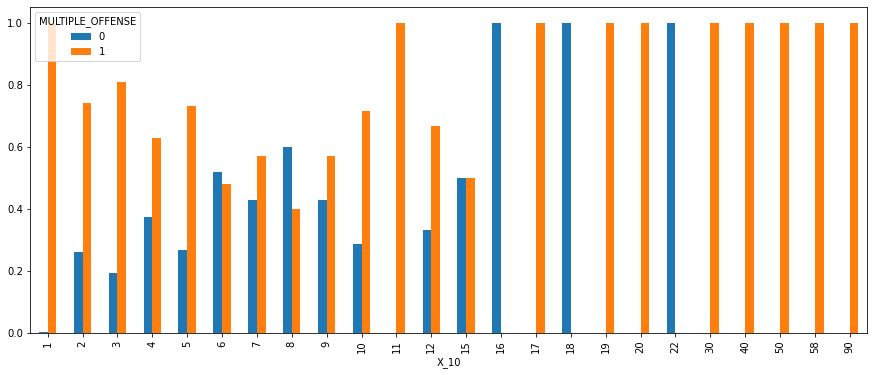

In [21]:
X_10 = pd.crosstab(train['X_10'],train['MULTIPLE_OFFENSE'])
X_10.div(X_10.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(15,6))

train_df.drop(train_df[(train_df['X_10']==11) | 
                       (train_df['X_10']==17) | 
                       (train_df['X_10']==19) | 
                       (train_df['X_10']==20) | 
                       (train_df['X_10']==30) |
                       (train_df['X_10']==40) | 
                       (train_df['X_10']==50) | 
                       (train_df['X_10']==58) | 
                       (train_df['X_10']==90)].index, inplace=True)

test_df.drop(test_df[(test_df['X_10']==11) | 
                       (test_df['X_10']==17) | 
                       (test_df['X_10']==19) | 
                       (test_df['X_10']==20) | 
                       (test_df['X_10']==30) |
                       (test_df['X_10']==40) | 
                       (test_df['X_10']==50) | 
                       (test_df['X_10']==58) | 
                       (test_df['X_10']==90)].index, inplace=True)

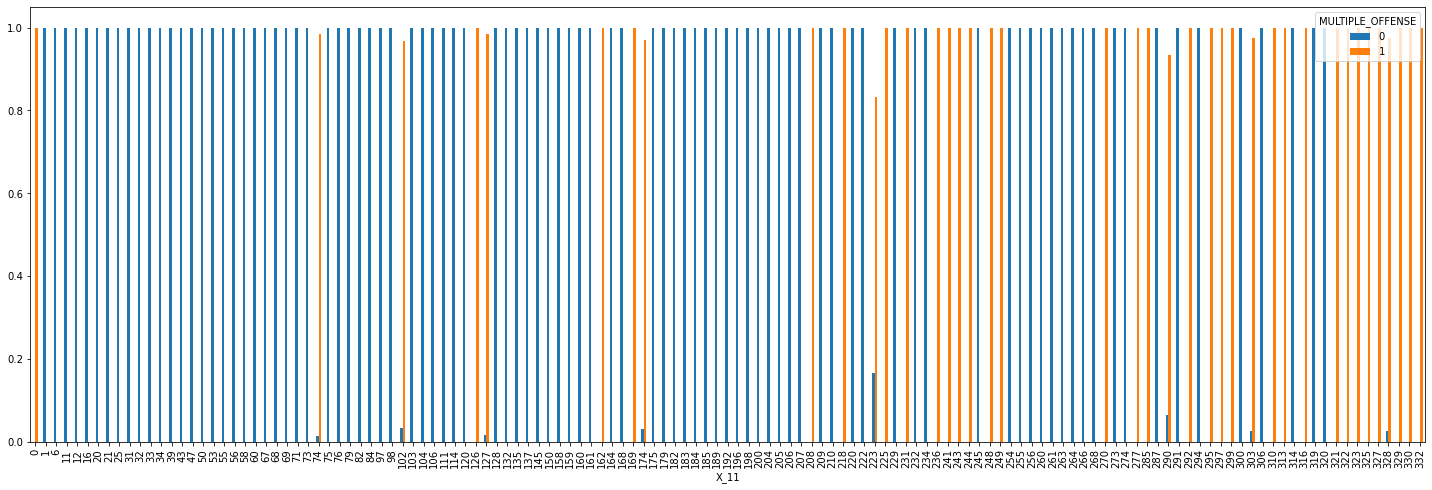

In [22]:
X_11 = pd.crosstab(train['X_11'],train['MULTIPLE_OFFENSE'])
X_11.div(X_11.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(25,8))

train_df.drop(train_df[(train_df['X_11']==0) | 
                       (train_df['X_11']==126) | 
                       (train_df['X_11']==162) | 
                       (train_df['X_11']==169) | 
                       (train_df['X_11']==208) |
                       (train_df['X_11']==218) | 
                       (train_df['X_11']==225) | 
                       (train_df['X_11']==231) | 
                       (train_df['X_11']==236) | 
                       (train_df['X_11']==241) | 
                       (train_df['X_11']==243) | 
                       (train_df['X_11']==244) | 
                       (train_df['X_11']==248) | 
                       (train_df['X_11']==249) |
                       (train_df['X_11']==270) | 
                       (train_df['X_11']==277) | 
                       (train_df['X_11']==285) | 
                       (train_df['X_11']==292) | 
                       (train_df['X_11']==295) | 
                       (train_df['X_11']==297) | 
                       (train_df['X_11']==299) | 
                       (train_df['X_11']==310) | 
                       (train_df['X_11']==313) |
                       (train_df['X_11']==316) | 
                       (train_df['X_11']==321) | 
                       (train_df['X_11']==322) | 
                       (train_df['X_11']==323) | 
                       (train_df['X_11']==325) |
                       (train_df['X_11']==327) | 
                       (train_df['X_11']==329) | 
                       (train_df['X_11']==330) | 
                       (train_df['X_11']==332)].index, inplace=True)

test_df.drop(test_df[(test_df['X_11']==0) | 
                       (test_df['X_11']==126) | 
                       (test_df['X_11']==162) | 
                       (test_df['X_11']==169) | 
                       (test_df['X_11']==208) |
                       (test_df['X_11']==218) | 
                       (test_df['X_11']==225) | 
                       (test_df['X_11']==231) | 
                       (test_df['X_11']==236) | 
                       (test_df['X_11']==241) | 
                       (test_df['X_11']==243) | 
                       (test_df['X_11']==244) | 
                       (test_df['X_11']==248) | 
                       (test_df['X_11']==249) |
                       (test_df['X_11']==270) | 
                       (test_df['X_11']==277) | 
                       (test_df['X_11']==285) | 
                       (test_df['X_11']==292) | 
                       (test_df['X_11']==295) | 
                       (test_df['X_11']==297) | 
                       (test_df['X_11']==299) | 
                       (test_df['X_11']==310) | 
                       (test_df['X_11']==313) |
                       (test_df['X_11']==316) | 
                       (test_df['X_11']==321) | 
                       (test_df['X_11']==322) | 
                       (test_df['X_11']==323) | 
                       (test_df['X_11']==325) |
                       (test_df['X_11']==327) | 
                       (test_df['X_11']==329) | 
                       (test_df['X_11']==330) | 
                       (test_df['X_11']==332)].index, inplace=True)

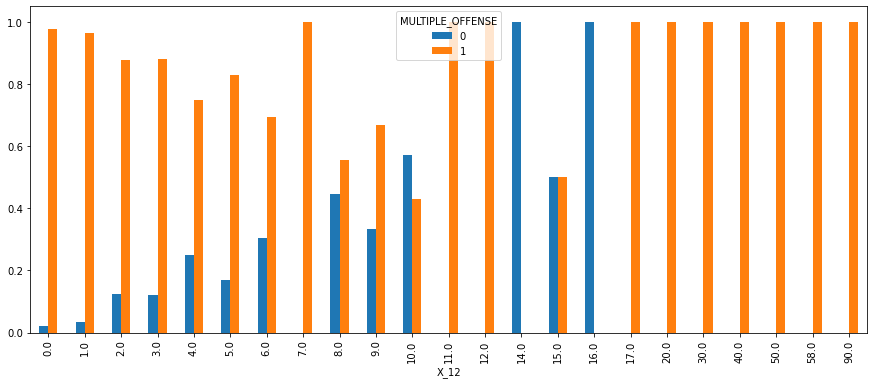

In [23]:
X_12 = pd.crosstab(train['X_12'],train['MULTIPLE_OFFENSE'])
X_12.div(X_12.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(15,6))

train_df.drop(train_df[(train_df['X_12']==7.0) | 
                       (train_df['X_12']==11.0) | 
                       (train_df['X_12']==12.0) | 
                       (train_df['X_12']==17.0) | 
                       (train_df['X_12']==20.0) |
                       (train_df['X_12']==30.0) | 
                       (train_df['X_12']==40.0) | 
                       (train_df['X_12']==50.0) | 
                       (train_df['X_12']==58.0) | 
                       (train_df['X_12']==90.0)].index, inplace=True)

test_df.drop(test_df[(test_df['X_12']==7.0) | 
                       (test_df['X_12']==11.0) | 
                       (test_df['X_12']==12.0) | 
                       (test_df['X_12']==17.0) | 
                       (test_df['X_12']==20.0) |
                       (test_df['X_12']==30.0) | 
                       (test_df['X_12']==40.0) | 
                       (test_df['X_12']==50.0) | 
                       (test_df['X_12']==58.0) | 
                       (test_df['X_12']==90.0)].index, inplace=True)

After extracting the features from the date parameter next step is to sort the data by "Date", because shuffling is set to false in the cross valiation.

In [24]:
train = train.sort_values(['DATE']).reset_index(drop=True)
test = test.sort_values(['DATE']).reset_index(drop=True)
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,YEAR,MONTH,DAY,WEEKDAY
0,CR_1141,1991-01-01,0,22,22,7,3,8,3,7,...,0,2.0,72,142,34,1,1991,1,1,1
1,CR_2248,1991-01-02,0,33,32,2,1,7,1,1,...,249,1.0,72,142,34,1,1991,1,2,2
2,CR_3131,1991-01-03,1,36,34,2,1,15,10,0,...,174,0.0,92,93,0,1,1991,1,3,3
3,CR_3546,1991-01-04,0,39,39,6,5,8,3,1,...,0,1.0,72,62,34,1,1991,1,4,4
4,CR_821,1991-01-05,1,22,22,7,3,15,10,0,...,174,0.0,103,93,48,1,1991,1,5,5


Dropping few columns from the train and test data

In [25]:
sorted_test_dates = test['DATE']
sorted_test_ids = test['INCIDENT_ID']
train = train.drop(['INCIDENT_ID', 'DATE'], axis=1)
test = test.drop(['INCIDENT_ID', 'DATE'], axis=1)
train.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,YEAR,MONTH,DAY,WEEKDAY
0,0,22,22,7,3,8,3,7,2,2,0,2.0,72,142,34,1,1991,1,1,1
1,0,33,32,2,1,7,1,1,6,1,249,1.0,72,142,34,1,1991,1,2,2
2,1,36,34,2,1,15,10,0,5,1,174,0.0,92,93,0,1,1991,1,3,3
3,0,39,39,6,5,8,3,1,6,1,0,1.0,72,62,34,1,1991,1,4,4
4,1,22,22,7,3,15,10,0,5,1,174,0.0,103,93,48,1,1991,1,5,5


In [26]:
test.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,YEAR,MONTH,DAY,WEEKDAY
0,1,36,34,2,1,15,10,1,6,1,249,1.0,92,93,34,1991,1,2,2
1,0,25,25,9,0,3,5,0,5,1,316,1.0,18,142,34,1991,1,3,3
2,5,40,40,2,1,16,12,1,5,1,249,1.0,92,29,34,1991,1,4,4
3,1,36,34,2,1,15,10,0,5,1,249,1.0,92,93,34,1991,1,5,5
4,1,22,22,7,3,15,10,1,6,1,316,1.0,72,62,34,1991,1,10,3


# Ensemble Modelling

In order to model the data, two ensemble techniques are used i.e. Light Gradient Boosting and Extreme Gradient Boosting with the Startified K-Fold cross validation (K=5 without shuffling) so that it covers the maximum feature from the data. Also, both the models are tuned w.r.t. the data and their probabilities are predicted.

In [27]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, recall_score

    LGBMClassifier

In [28]:
err = []
y_pred_tot_lgm = []

fold = KFold(n_splits=5)
i = 1

X = train.drop(['MULTIPLE_OFFENSE'], axis=1)
y = train['MULTIPLE_OFFENSE']
X_test = test

for train_index, test_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = LGBMClassifier(boosting_type='gbdt',
                       max_depth=5,
                       learning_rate=0.01,
                       n_estimators=5000,
                       min_child_weight=0.01,
                       colsample_bytree=0.5,
                       random_state=1994)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          verbose=0)
    pred_y = m.predict(x_val)
    print(i, " err_lgm: ", round(recall_score(y_val, pred_y), 3))
    err.append(recall_score(y_val, pred_y))
    pred_test = m.predict(X_test)
    pred_test_prob = m.predict_proba(X_test)[:,-1]
    i = i + 1
    y_pred_tot_lgm.append(pred_test_prob)
    
plgbm_test = np.mean(y_pred_tot_lgm, 0)

1  err_lgm:  1.0
2  err_lgm:  1.0
3  err_lgm:  1.0
4  err_lgm:  1.0
5  err_lgm:  0.999


    XGBClassifier

In [29]:
errxgb = []
y_pred_tot_xgb = []

fold = KFold(n_splits=5)
i = 1
for train_index, test_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = XGBClassifier(max_depth=5,
                      learning_rate=0.07,
                      n_estimators=5000,
                      random_state=1994)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          verbose=0)
    pred_y = m.predict(x_val)
    print(i, " err_xgb: ", round(recall_score(y_val, pred_y), 3))
    errxgb.append(recall_score(y_val, pred_y))
    pred_test = m.predict(X_test)
    pred_test_prob = m.predict_proba(X_test)[:,-1]
    i = i + 1
    y_pred_tot_xgb.append(pred_test_prob)

pxgb_test = np.mean(y_pred_tot_xgb, 0)

1  err_xgb:  1.0
2  err_xgb:  1.0
3  err_xgb:  1.0
4  err_xgb:  1.0
5  err_xgb:  0.998


    Stacking of the predicted probabilities on test set

In [30]:
(np.mean(err, 0) + np.mean(errxgb)) / 2

0.9996285490173605

In [31]:
pred_test = (pxgb_test+plgbm_test)/2

    Test Set submission

In [32]:
pred_test = np.array([round(i) for i in pred_test])
submission = pd.DataFrame({'DATE':sorted_test_dates,
                           'INCIDENT_ID': sorted_test_ids,
                           'MULTIPLE_OFFENSE':pred_test})
submission.head()

,DATE,INCIDENT_ID,MULTIPLE_OFFENSE
0,1991-01-02,CR_3153,1.0
1,1991-01-03,CR_1413,1.0
2,1991-01-04,CR_3882,1.0
3,1991-01-05,CR_2498,1.0
4,1991-01-10,CR_1083,1.0


In [33]:
submission = pd.merge(test1[['DATE','INCIDENT_ID']], 
                      submission, 
                      on=['DATE','INCIDENT_ID'], how='outer')[['INCIDENT_ID', 
                                                  'MULTIPLE_OFFENSE']]
submission.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1.0
1,CR_103520,1.0
2,CR_196089,1.0
3,CR_112195,1.0
4,CR_149832,1.0


submission.isnull().sum()
submission.fillna(1.0, inplace=True)

In [34]:
submission['MULTIPLE_OFFENSE'].value_counts()

1.0    15181
0.0      722
Name: MULTIPLE_OFFENSE, dtype: int64

In [35]:
test.shape, submission.shape

((15903, 19), (15903, 2))

In [36]:
submission.to_csv('submission.csv', index=False)